In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import joblib


In [ ]:
dataset_df=pd.read_csv('/content/dataset_df_nha_dat')
# #dataset_df_1=dataset_df_1.drop('date_submitted',axis=1)





<ipython-input-2153-b161cafa62e2>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_df=pd.read_csv('/content/dataset_df_nha_dat')


In [ ]:
# dataset_df = pd.concat([dataset_df_1, dataset_df_2,dataset_df_3, dataset_df_4,dataset_df_5, dataset_df_6,dataset_df_7, dataset_df_8,dataset_df_9, dataset_df_10,dataset_df_11, dataset_df_12,dataset_df_13,dataset_df_14, dataset_df_15,dataset_df_16,dataset_df_17, dataset_df_18,dataset_df_19,dataset_df_20, dataset_df_21,dataset_df_22,dataset_df_23], ignore_index=True)


In [ ]:
dataset_df.head(100)

,title,links,price,area,price_per_m2,house_direction,frontage,way_in,bedroom,toilet,floors,location,description,property_legal_document,date_submitted
0,Bán gấp căn liền kề Vinhomes Ocean Park khu nh...,https://batdongsan.com.vn/ban-nha-biet-thu-lie...,"7,2 tỷ",56 m²,"~128,57 triệu/m²",0,4 m,13 m,6 phòng,6 phòng,5 tầng,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",ĐD10 - 36 - một trong những căn liền kề sở hữu...,Sổ đỏ/ Sổ hồng,0
1,Bán đất mặt tiền Đà Lạt nằm ngay bên khách sạn...,https://batdongsan.com.vn/ban-dat-pho-tran-dai...,36 tỷ,1.265 m²,"~28,46 triệu/m²",0,23 m,10 m,0,0,0,"Phố Trần Đại Nghĩa, Phường 8, Đà Lạt, Lâm Đồng","Vị trí: Mặt tiền Trần Đại Nghĩa, nằm ngay cạnh...",Sổ đỏ/ Sổ hồng,0
2,"Bán nhà khu chợ Phạm Văn Bạch, Cống Lở 590m2 1...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"52,5 tỷ",590 m²,"~88,98 triệu/m²",Đông - Nam,0,6 m,2 phòng,2 phòng,3 tầng,"Đường Cống Lở, Phường 15, Tân Bình, Hồ Chí Minh",+ Nhà đường Cống Lở khu chợ Phạm Văn Bạch - tr...,Sổ đỏ/ Sổ hồng,0
3,"Biệt Thự Classia Khang Điền Q9, góc 3 mặt tiền...",https://batdongsan.com.vn/ban-nha-biet-thu-lie...,"46,51 tỷ","239,9 m²","~193,86 triệu/m²",Đông - Nam,"13,2 m",18 m,0,0,4 tầng,"Dự án The Classia, Đường Võ Chí Công, Phường P...",Cần bán gấp căn biệt thự vip nhất dự án The Cl...,Sổ đỏ/ Sổ hồng,0
4,Hot quỹ hàng độc quyền CĐT 5 lô đất nền hướng ...,https://batdongsan.com.vn/ban-dat-phuong-lam-h...,Thỏa thuận,108 m²,0,Đông - Nam,6 m,14 m,0,0,0,"Phường Lam Hạ, Thành phố Phủ Lý, Hà Nam",Tôi đang có quỹ hàng độc quyền lô đất nền hướn...,Sổ đỏ/ Sổ hồng,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Chuyển nhượng đất xây khách sạn, ngay công viê...",https://batdongsan.com.vn/ban-dat-duong-quang-...,150 triệu/m²,295 m²,"~44,25 tỷ",Đông - Bắc,11 m,6 m,0,0,0,"Đường Quang Trung, Phường 1, Vũng Tàu, Bà Rịa ...",- Chính chủ chuyển nhượng lô đất đối diện công...,Đã có sổ hồng.,0
96,Bán nhà riêng xã Mỹ Lộc huyện Cần Giuộc Tỉnh L...,https://batdongsan.com.vn/ban-nha-rieng-xa-my-...,650 triệu,28 m²,"~23,21 triệu/m²",0,0,0,2 phòng,2 phòng,2 tầng,"Xã Mỹ Lộc, Cần Giuộc, Long An",Nhà đối diện trường trung học Nguyễn Đình Chiể...,0,0
97,"Bán đất Bình Thắng, Bù Gia Mập, Bình Phước giá...",https://batdongsan.com.vn/ban-dat-xa-binh-than...,360 triệu,"301,4 m²","~1,19 triệu/m²",0,0,0,0,0,0,"Xã Bình Thắng, Bù Gia Mập, Bình Phước",cần tiền nên tôi cần bán gấp 1 vào lo đất tại ...,0,0
98,Ban lô góc đất dịch vụ Phú Vinh 45m2 - kinh do...,https://batdongsan.com.vn/ban-dat-xa-an-khanh-...,"9,5 tỷ",45 m²,"~211,11 triệu/m²",Tây - Nam,"4,5 m",30 m,0,0,0,"Xã An Khánh, Huyện Hoài Đức, Hà Nội",Bán siêu phẩm lô góc đất dịch vụ Phú Vinh 45m²...,Sổ đỏ/ Sổ hồng,0


In [ ]:
dataset_df['links']

0         https://batdongsan.com.vn/ban-nha-biet-thu-lie...
1         https://batdongsan.com.vn/ban-dat-pho-tran-dai...
2         https://batdongsan.com.vn/ban-nha-rieng-duong-...
3         https://batdongsan.com.vn/ban-nha-biet-thu-lie...
4         https://batdongsan.com.vn/ban-dat-phuong-lam-h...
                                ...                        
109489    https://batdongsan.com.vn/ban-dat-xa-thuy-xuan...
109490    https://batdongsan.com.vn/ban-nha-mat-pho-duon...
109491    https://batdongsan.com.vn/ban-nha-mat-pho-duon...
109492    https://batdongsan.com.vn/ban-nha-biet-thu-lie...
109493    https://batdongsan.com.vn/ban-nha-biet-thu-lie...
Name: links, Length: 109494, dtype: object

In [ ]:
def get_house_type(description):
  """
  Hàm xác định loại nhà dựa trên mô tả.

  Args:
      description (str): Mô tả nhà (có thể là URL hoặc chuỗi văn bản).

  Returns:
      int: Loại nhà (1: nhà ngõ/hẻm, 2: nhà mặt phố, 3: căn liền kề, 4: biệt thự, 5: URL nhà mặt phố batdongsan.com.vn, 6: nhà mặt phố tại batdongsan.com.vn, 7: chứa cụm từ "abc", None: không xác định)
  """

  description = description.lower()

  # Kiểm tra URL nhà mặt phố batdongsan.com.vn
  if "https://batdongsan.com.vn/ban-nha-rieng" in description:
    return 5

  # Tạo danh sách các từ khóa nhà ngõ/hẻm
  keywords_ngo_hem = ["ngõ", "hẻm"]

  # Kiểm tra nhà ngõ/hẻm
  if any(keyword.lower() in description for keyword in keywords_ngo_hem):
    return 1



  # Không xác định loại nhà
  return None

# # Hàm kiểm tra URL
# def is_url(text):
#   import re
#   url_regex = 'https?://(?:www\\.)?(?:[a-zA-Z0-9@:%._\\+~#?&//=]{2,256}\\.[a-z]{2,6})\\b(?:[-a-zA-Z0-9@:%._\\+~#?&//=]*)'
#   return bool(re.search(url_regex, text))

# Gán giá trị cho cột 'house_type' sử dụng phương thức 'apply'
dataset_df['house_type'] = dataset_df['links'].apply(get_house_type)
dataset_df = dataset_df[(dataset_df['house_type'] == 5)]

In [ ]:
len(dataset_df)

35076

In [ ]:
dataset_df = dataset_df[dataset_df['location'] != 0]

In [ ]:
dataset_df.to_csv('dataset_df', index=False)

In [ ]:
# import pandas as pd

# # Đọc dữ liệu từ file CSV và xử lý lỗi khi đọc
# try:
#   dataset_df_6 = pd.read_csv('/content/chungcu_batdongsan500_7.csv', encoding='utf-16')

# except Exception as e:
#     print("Lỗi khi đọc file CSV:", e)
#     # Không cần gán dataset_df_6 = pd.DataFrame() ở đây

In [ ]:
# dataset_df = pd.concat([dataset_df_1, dataset_df_2,dataset_df_3,dataset_df_4,dataset_df_5,dataset_df_6,dataset_df_7,dataset_df_8,dataset_df_9,dataset_df_10,dataset_df_11,dataset_df_12,dataset_df_13,dataset_df_14], ignore_index=True)


In [ ]:
filtered_data = dataset_df[dataset_df['price_per_m2'].str.contains('tỷ')]


In [ ]:

filtered_data['price_per_m2'] = filtered_data['price_per_m2'].replace(',', '.', regex=True)

filtered_data['price_per_m2'] = filtered_data['price_per_m2'].replace('[^\d.]', '', regex=True)
try:
  filtered_data['price_per_m2'] = pd.to_numeric(filtered_data['price_per_m2'], errors='coerce')
except:
  pass

# Xóa các hàng có giá trị NaN (không phải số thực)
filtered_data = filtered_data.dropna(subset=['price_per_m2'])

<ipython-input-2164-b93b4fddacf5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['price_per_m2'] = filtered_data['price_per_m2'].replace(',', '.', regex=True)
<ipython-input-2164-b93b4fddacf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['price_per_m2'] = filtered_data['price_per_m2'].replace('[^\d.]', '', regex=True)
<ipython-input-2164-b93b4fddacf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
filtered_data.head()

,title,links,price,area,price_per_m2,house_direction,frontage,way_in,bedroom,toilet,floors,location,description,property_legal_document,date_submitted,house_type
1230,"Bán nhà 95.6m2 Thôn Thượng, phường Phù Khê, th...",https://batdongsan.com.vn/ban-nha-rieng-xa-phu...,41 triệu/m²,"95,6 m²",3.92,Tây - Nam,5 m,6 m,0,0,5 tầng,"Thôn Thượng, Xã Phù Khê, Từ Sơn, Bắc Ninh","Cần bán nhà tại Thôn Thượng, phường Phù Khê, t...",Sổ đỏ/ Sổ hồng,0,5.0
1325,"Bán nhà phố Khâm Thiên, Đống Đa, Hà Nội, DT 34...",https://batdongsan.com.vn/ban-nha-rieng-pho-kh...,350 triệu/m²,340 m²,119.00,Đông - Bắc,9 m,0,5 phòng,3 phòng,4 tầng,"Số 211, Phố Khâm Thiên, Phường Khâm Thiên, Đốn...","Bán nhà phố số 211 Khâm Thiên, Đống Đa, Hà Nội...",0,0,5.0
1326,"Bán nhà phố Khâm Thiên, Đống Đa, Hà Nội, DT 34...",https://batdongsan.com.vn/ban-nha-rieng-pho-kh...,350 triệu/m²,340 m²,119.00,Đông - Bắc,9 m,0,5 phòng,3 phòng,4 tầng,"Số 211, Phố Khâm Thiên, Phường Khâm Thiên, Đốn...","Bán nhà phố số 211 Khâm Thiên, Đống Đa, Hà Nội...",0,0,5.0
1346,"Bán nhà phố Khâm Thiên, Đống Đa, Hà Nội, DT 34...",https://batdongsan.com.vn/ban-nha-rieng-pho-kh...,350 triệu/m²,340 m²,119.00,Đông - Bắc,9 m,0,5 phòng,3 phòng,4 tầng,"Số 211, Phố Khâm Thiên, Phường Khâm Thiên, Đốn...","Bán nhà phố số 211 Khâm Thiên, Đống Đa, Hà Nội...",0,0,5.0
1366,"Bán nhà phố Khâm Thiên, Đống Đa, Hà Nội, DT 34...",https://batdongsan.com.vn/ban-nha-rieng-pho-kh...,350 triệu/m²,340 m²,119.00,Đông - Bắc,9 m,0,5 phòng,3 phòng,4 tầng,"Số 211, Phố Khâm Thiên, Phường Khâm Thiên, Đốn...","Bán nhà phố số 211 Khâm Thiên, Đống Đa, Hà Nội...",0,0,5.0


In [ ]:
filtered_data['price_per_m2'] = filtered_data['price_per_m2']*1000


In [ ]:

dataset_df['price_per_m2'] = dataset_df['price_per_m2'].replace(',', '.', regex=True)

dataset_df['price_per_m2'] = dataset_df['price_per_m2'].replace('[^\d.]', '', regex=True)

try:
  dataset_df['price_per_m2'] = pd.to_numeric(dataset_df['price_per_m2'], errors='coerce')
except:
  pass

# Xóa các hàng có giá trị NaN (không phải số thực)
dataset_df = dataset_df.dropna(subset=['price_per_m2'])

In [ ]:
dataset_df = pd.concat([dataset_df, filtered_data], ignore_index=True)


In [ ]:
len(dataset_df)

35298

In [ ]:
dataset_df.head()

,title,links,price,area,price_per_m2,house_direction,frontage,way_in,bedroom,toilet,floors,location,description,property_legal_document,date_submitted,house_type
0,"Bán nhà khu chợ Phạm Văn Bạch, Cống Lở 590m2 1...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"52,5 tỷ",590 m²,88.98,Đông - Nam,0,6 m,2 phòng,2 phòng,3 tầng,"Đường Cống Lở, Phường 15, Tân Bình, Hồ Chí Minh",+ Nhà đường Cống Lở khu chợ Phạm Văn Bạch - tr...,Sổ đỏ/ Sổ hồng,0,5.0
1,Chủ Cần Bán Gấp 192 Lê Trọng Tấn 70m. C4 MT 4m...,https://batdongsan.com.vn/ban-nha-rieng-duong-...,"10,8 tỷ",68 m²,158.82,0,0,0,1 phòng,1 phòng,1 tầng,"Đường Lê Trọng Tấn, Phường Khương Mai, Thanh X...",NGÕ THÔNG Ô TÔ KINH DOANH XÂY 7 TẦNG THÁNG MÁY...,Sổ đỏ/ Sổ hồng,0,5.0
2,Bán nhà đẹp mặt ngõ phố Minh Khai Quận HBT HN....,https://batdongsan.com.vn/ban-nha-rieng-duong-...,"6,5 tỷ",40 m²,162.50,0,"4,3 m",0,4 phòng,4 phòng,4 tầng,"Đường Minh Khai, Phường Minh Khai, Hai Bà Trưn...",Bán nhà đẹp mặt ngõ phố Minh Khai Quận HBT HN....,0,0,5.0
3,Hẻm 4m đường Nguyễn Hữu Tiến 4x14.5m 1 lầu,https://batdongsan.com.vn/ban-nha-rieng-duong-...,"4,3 tỷ",57 m²,75.44,0,16 m,4 m,2 phòng,2 phòng,2 tầng,"Đường Nguyễn Hữu Tiến, Phường Tây Thạnh, Tân P...","Bán nhà hẻm đường Nguyễn Hữu Tiến, Tây Thạnh, ...",Sổ đỏ/ Sổ hồng,0,5.0
4,"Bán nhà khu chợ Phạm Văn Bạch, Cống Lở 590m2 1...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"52,5 tỷ",590 m²,88.98,Đông - Nam,0,6 m,2 phòng,2 phòng,3 tầng,"Đường Cống Lở, Phường 15, Tân Bình, Hồ Chí Minh",+ Nhà đường Cống Lở khu chợ Phạm Văn Bạch - tr...,Sổ đỏ/ Sổ hồng,0,5.0


In [ ]:
dataset_df['area'] = dataset_df['area'].replace('[^\d.]', '', regex=True)
try:
  dataset_df['area'] = pd.to_numeric(dataset_df['area'], errors='coerce')
except:
  pass

dataset_df['area'] = dataset_df['area'].astype(float)


In [ ]:


dataset_df = dataset_df[dataset_df['location'] != 0]


dataset_df['floors'] = dataset_df['floors'].replace('[^\d.]', '', regex=True).astype(float)
dataset_df['way_in'] = dataset_df['way_in'].replace('[^\d.]', '', regex=True).astype(float)
dataset_df['frontage'] = dataset_df['frontage'].replace('[^\d.]', '', regex=True).astype(float)

dataset_df['bedroom'] = dataset_df['bedroom'].replace('[^\d.]', '', regex=True).astype(float)
dataset_df['toilet'] = dataset_df['toilet'].replace('[^\d.]', '', regex=True).astype(float)

dataset_df['frontage'] = dataset_df['frontage'].replace('[^\d.]', '', regex=True).astype(float)
dataset_df['way_in'] = dataset_df['way_in'].replace('[^\d.]', '', regex=True).astype(float)

dataset_df['house_direction'] = dataset_df['house_direction'].replace('0', pd.NA, regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('0', pd.NA, regex=False)

dataset_df = dataset_df.dropna(subset=['property_legal_document'])

dataset_df = dataset_df.dropna(subset=['house_direction'])

dataset_df['price_per_m2'] = dataset_df['price_per_m2'].replace('0', pd.NA, regex=False).astype(float)

dataset_df = dataset_df.dropna(subset=['price_per_m2'])


dataset_df= dataset_df.reset_index(drop=True)





In [ ]:
dataset_df['location']=dataset_df['location'].apply(lambda x: x.split(",") )

for index, x in enumerate(dataset_df['location']):
    if len(x) < 4:
        print("Error in row {}: {}".format(index, x))
        dataset_df=dataset_df.drop(index,axis=0)





Error in row 46: ['Phường Phú Lương', ' Hà Đông', ' Hà Nội']
Error in row 47: ['Phường Phú Lương', ' Hà Đông', ' Hà Nội']
Error in row 78: ['Phường Ngọc Hiệp', ' Nha Trang', ' Khánh Hòa']
Error in row 115: ['Xã Đại Thành', ' Quốc Oai', ' Hà Nội']
Error in row 117: ['Xã Đại Thành', ' Quốc Oai', ' Hà Nội']
Error in row 119: ['Xã Đại Thành', ' Quốc Oai', ' Hà Nội']
Error in row 136: ['Phường 13', ' Tân Bình', ' Hồ Chí Minh.']
Error in row 137: ['Phường 13', ' Tân Bình', ' Hồ Chí Minh.']
Error in row 143: ['Xã La Phù', ' Hoài Đức', ' Hà Nội']
Error in row 149: ['Phường Vĩnh Phú', ' Thuận An', ' Bình Dương']
Error in row 151: ['Phường Vĩnh Phú', ' Thuận An', ' Bình Dương']
Error in row 158: ['Phường Phước Bình', ' Quận 9', ' Hồ Chí Minh']
Error in row 160: ['Phường Phước Bình', ' Quận 9', ' Hồ Chí Minh']
Error in row 162: ['Phường Phước Bình', ' Quận 9', ' Hồ Chí Minh']
Error in row 294: ['Cự khê', ' thành oai', ' hà nội']
Error in row 297: ['Xã An Đồng', ' An Dương', ' Hải Phòng']
Error in

In [ ]:
dataset_df['Tỉnh']=dataset_df['location'].apply(lambda x :x[-1] )
dataset_df['Quận']=dataset_df['location'].apply(lambda x :x[-2] )
dataset_df['Phường']=dataset_df['location'].apply(lambda x :x[-3] )
dataset_df['Đường']=dataset_df['location'].apply(lambda x :x[-4] )


In [ ]:
# dataset_df['Tỉnh'] = dataset_df['Tỉnh'].astype(str)
dataset_df['Tỉnh'] = dataset_df['Tỉnh'].str.replace('^.{1}', '', regex=True)
# dataset_df['Tỉnh'] = dataset_df['Tỉnh'].str.replace(' ', '', 1)
dataset_df['Quận'] = dataset_df['Quận'].str.replace('^.{1}', '', regex=True)

dataset_df['Phường'] = dataset_df['Phường'].str.replace('^.{1}', '', regex=True)

# dataset_df['Đường'] = dataset_df['Đường'].str.replace('^.{1}', '', regex=True)

In [ ]:
len(dataset_df)

6623

In [ ]:
print(dataset_df['Tỉnh'].value_counts())


Tỉnh
Hồ Chí Minh        2864
Hà Nội             1969
Đà Nẵng             338
Khánh Hòa           325
Hải Phòng           292
Bình Dương          192
Đồng Nai            110
Hà Nội.              94
Hồ Chí Minh.         69
Bà Rịa Vũng Tàu      66
Cần Thơ              50
Đắk Lắk              28
Khánh Hòa.           26
Long An              21
Bắc Ninh             21
Lâm Đồng             18
Thái Nguyên.         16
Kiên Giang           16
Bình Thuận           12
Lào Cai              11
Quảng Ninh            9
Quảng Nam             9
Thanh Hóa             9
Thừa Thiên Huế        6
Phú Yên               6
Tp Hồ Chí Minh        5
Hà Tĩnh               4
Thái Nguyên           4
Hải Dương             4
Bến Tre               4
Bình Định             3
Nam Định              3
Sóc Trăng             3
Lạng Sơn              3
Bình Dương.           2
Tây Ninh              2
Quảng Ngãi            2
Đồng Nai.             2
Ninh Thuận            1
Đà Nẵng.              1
Hậu Giang             1
Tỉnh Bình D

In [ ]:
print(dataset_df['Quận'].value_counts())

Quận
Bình Tân                 348
Nha Trang                335
Thủ Đức                  313
Quận 12                  300
Gò Vấp                   287
                        ... 
Phụng Hiệp                 1
Long Thành                 1
Phan Rang - Tháp Chàm      1
Châu Thành                 1
Thành phố Bắc Ninh         1
Name: count, Length: 114, dtype: int64


In [ ]:
print(dataset_df['Phường'].value_counts())

Phường
Phường 12             133
Phường 13             107
Phường 15              89
Phường 9               89
Phường 11              84
                     ... 
Phường Xuân Phương      1
Xã Tân Kim              1
Phường Thượng Cát       1
Phường Phú Thủy         1
Phường Định Công        1
Name: count, Length: 495, dtype: int64


In [ ]:
print(dataset_df['Đường'].value_counts())

Đường
Đường Lê Hồng Phong     62
Đường Lê Văn Sỹ         54
Đường Quang Trung       50
Đường Huỳnh Văn Bánh    47
Đường Lê Trọng Tấn      46
                        ..
Đường Cổ Bản             1
Đường Chế Lan Viên       1
Đường DC7                1
Đường Phúc Đam           1
Đường Hoàng Sa           1
Name: count, Length: 1168, dtype: int64


In [ ]:
len(dataset_df)

6623

In [ ]:
dataset_df.head(100)

,title,links,price,area,price_per_m2,house_direction,frontage,way_in,bedroom,toilet,floors,location,description,property_legal_document,date_submitted,house_type,Tỉnh,Quận,Phường,Đường
0,"Bán nhà khu chợ Phạm Văn Bạch, Cống Lở 590m2 1...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"52,5 tỷ",590.0,88.98,Đông - Nam,0.0,6.0,2.0,2.0,3.0,"[Đường Cống Lở, Phường 15, Tân Bình, Hồ Chí...",+ Nhà đường Cống Lở khu chợ Phạm Văn Bạch - tr...,Sổ đỏ/ Sổ hồng,0,5.0,Hồ Chí Minh,Tân Bình,Phường 15,Đường Cống Lở
1,"Bán nhà khu chợ Phạm Văn Bạch, Cống Lở 590m2 1...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"52,5 tỷ",590.0,88.98,Đông - Nam,0.0,6.0,2.0,2.0,3.0,"[Đường Cống Lở, Phường 15, Tân Bình, Hồ Chí...",+ Nhà đường Cống Lở khu chợ Phạm Văn Bạch - tr...,Sổ đỏ/ Sổ hồng,0,5.0,Hồ Chí Minh,Tân Bình,Phường 15,Đường Cống Lở
2,Nhà ngay chợ ngã 4 nước đá SHR 4x12 hẻm 4m thô...,https://batdongsan.com.vn/ban-nha-rieng-duong-...,"2,87 tỷ",48.0,59.79,Đông - Bắc,4.0,4.0,2.0,1.0,0.0,"[Đường 10, Xã Thới Tam Thôn, Hóc Môn, Hồ Ch...",081\n++ Nhà Sổ Hồng riêng 4x12 cấp 4 có 2 PN\n...,Sổ đỏ/ Sổ hồng,0,5.0,Hồ Chí Minh,Hóc Môn,Xã Thới Tam Thôn,Đường 10
3,Chính chủ bán nhà hẻm xe hơi Huỳnh Văn Bánh 60...,https://batdongsan.com.vn/ban-nha-rieng-duong-...,"9,3 tỷ",60.0,155.00,Tây - Bắc,0.0,0.0,0.0,0.0,2.0,"[Đường Huỳnh Văn Bánh, Phường 13, Phú Nhuận,...",CHính chủ bán gấp nhà hẻm xe hơi Huỳnh Văn Bán...,Sổ hồng chính chủ mua bán.,0,5.0,Hồ Chí Minh,Phú Nhuận,Phường 13,Đường Huỳnh Văn Bánh
4,Bán nhà cấp 4 DT 4.5x22m có 5 phòng trọ ngay N...,https://batdongsan.com.vn/ban-nha-rieng-duong-...,Thỏa thuận,103.0,0.00,Bắc,5.0,5.0,6.0,5.0,0.0,"[Đường Nguyễn Tuyển, Phường Bình Trưng Tây, ...",Bán nhà cấp 4 ngay Nguyễn Tuyển Q 2 DT 4.5x22m...,Sổ đỏ/ Sổ hồng.,0,5.0,Hồ Chí Minh,Quận 2,Phường Bình Trưng Tây,Đường Nguyễn Tuyển
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,"Ra gấp nhà 4x19m KDC Phú Hồng Thịnh, gần bên L...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"4,35 tỷ",76.0,57.24,Bắc,4.0,13.0,3.0,5.0,3.0,"[Đường Quốc lộ 1K, Phường Bình An, Dĩ An, B...","4,35 tỷ, 4x19m nhà KDC Phú Hồng Thịnh.\nGần Là...",Sổ đỏ/ Sổ hồng.,0,5.0,Bình Dương,Dĩ An,Phường Bình An,Đường Quốc lộ 1K
99,"Ra gấp nhà 4x19m KDC Phú Hồng Thịnh, gần bên L...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"4,35 tỷ",76.0,57.24,Bắc,4.0,13.0,3.0,5.0,3.0,"[Đường Quốc lộ 1K, Phường Bình An, Dĩ An, B...","4,35 tỷ, 4x19m nhà KDC Phú Hồng Thịnh.\nGần Là...",Sổ đỏ/ Sổ hồng.,0,5.0,Bình Dương,Dĩ An,Phường Bình An,Đường Quốc lộ 1K
100,"Ra gấp nhà 4x19m KDC Phú Hồng Thịnh, gần bên L...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"4,35 tỷ",76.0,57.24,Bắc,4.0,13.0,3.0,5.0,3.0,"[Đường Quốc lộ 1K, Phường Bình An, Dĩ An, B...","4,35 tỷ, 4x19m nhà KDC Phú Hồng Thịnh.\nGần Là...",Sổ đỏ/ Sổ hồng.,0,5.0,Bình Dương,Dĩ An,Phường Bình An,Đường Quốc lộ 1K
101,Bán dãy nhà trọ 500m2 - 27 tỷ - trung tâm Quận 7,https://batdongsan.com.vn/ban-nha-rieng-duong-...,27 tỷ,500.0,54.00,Nam,12.0,10.0,0.0,0.0,0.0,"[Dự án Nam Long Phú Thuận, Đường Gò Ô Môi, P...",Cần bán dãy nhà trọ ngang 12x 44 (500m²).\nCho...,Sổ đỏ/ Sổ hồng,0,5.0,Hồ Chí Minh,Quận 7,Phường Phú Thuận,Đường Gò Ô Môi


In [ ]:
dataset_df = dataset_df[(dataset_df['toilet'] != 0)]
dataset_df = dataset_df[(dataset_df['bedroom'] != 0)]
dataset_df = dataset_df[(dataset_df['price_per_m2'] != 0)]
dataset_df = dataset_df[(dataset_df['area'] != 0)]
dataset_df = dataset_df[(dataset_df['floors'] != 0)]
dataset_df = dataset_df[(dataset_df['frontage'] != 0)]
dataset_df = dataset_df[(dataset_df['way_in'] != 0)]
# dataset_df = dataset_df[(dataset_df['house_direction'] != 0)]

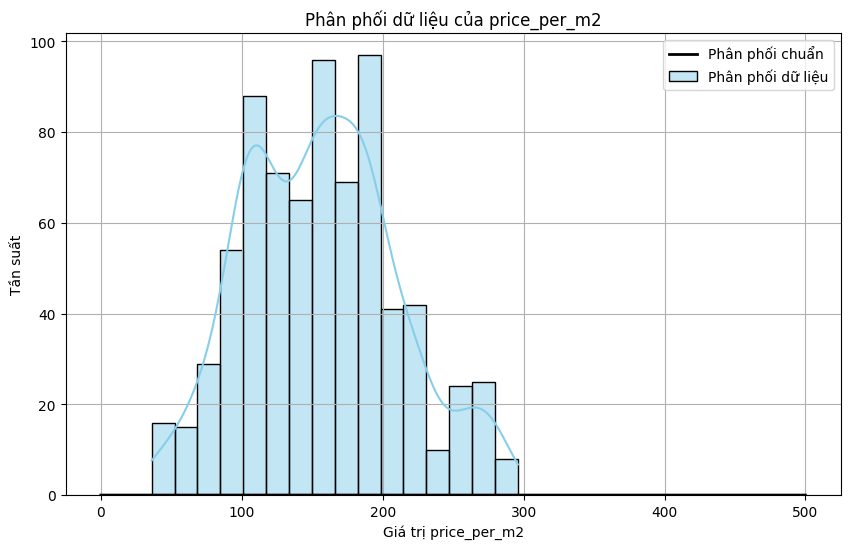

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Tính giá trị trung bình và phương sai của cột 'price_per_m2'
mean_value = dataset_df['price_per_m2'].mean()
std_dev = dataset_df['price_per_m2'].std()

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset_df['price_per_m2'], kde=True, color='skyblue', label='Phân phối dữ liệu')

# Vẽ đường phân phối chuẩn
xmin = 0  # Set minimum x-axis value to 0
xmax = 500  # Set maximum x-axis value to 500
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_value, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Phân phối chuẩn')

plt.title('Phân phối dữ liệu của price_per_m2')
plt.xlabel('Giá trị price_per_m2')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
len(dataset_df)

4384

In [ ]:
dataset_df=dataset_df[(dataset_df['price_per_m2'] <300)&(dataset_df['price_per_m2'] >30) ]


In [ ]:
print(dataset_df['price_per_m2'].value_counts())

price_per_m2
100.00    36
50.00     35
150.00    24
66.67     23
105.00    20
          ..
112.33     1
31.20      1
154.76     1
98.35      1
245.09     1
Name: count, Length: 1005, dtype: int64


In [ ]:
dataset_df['toilet'].value_counts()


toilet
3.0     1071
4.0      934
2.0      782
5.0      379
6.0      250
1.0      162
7.0       47
11.0      44
9.0       25
8.0       23
13.0      21
10.0      20
20.0      19
27.0      16
17.0      15
16.0      13
18.0      11
23.0       6
36.0       5
22.0       5
15.0       5
54.0       4
90.0       4
39.0       4
14.0       4
38.0       2
35.0       2
43.0       1
76.0       1
32.0       1
25.0       1
28.0       1
Name: count, dtype: int64

In [ ]:
dataset_df = dataset_df[(dataset_df['toilet'] < 10)&(dataset_df['toilet']>0)]

In [ ]:
dataset_df['bedroom'].value_counts()

bedroom
3.0     1245
4.0     1099
2.0      558
5.0      394
6.0      219
1.0       50
7.0       39
8.0       32
9.0       27
10.0       6
11.0       3
15.0       1
Name: count, dtype: int64

In [ ]:
dataset_df = dataset_df[(dataset_df['bedroom'] < 7)&(dataset_df['bedroom']>0)]

In [ ]:
dataset_df['floors'].value_counts()


floors
4.0     900
3.0     814
2.0     746
5.0     721
1.0     260
6.0      80
7.0      36
24.0      6
8.0       2
Name: count, dtype: int64

In [ ]:
dataset_df = dataset_df[(dataset_df['floors'] < 7)]

In [ ]:
len(dataset_df)

3521

In [ ]:
# Tính toán tần suất lặp lại của mỗi giá trị trong cột 'Phường'
value_counts = dataset_df['Phường'].value_counts()

# Lấy ra danh sách các giá trị có tần suất lặp lại nhỏ hơn 5
values_to_drop = value_counts[value_counts < 5].index

# Lọc các hàng chứa các giá trị có tần suất lặp lại nhỏ hơn 5
filtered_df = dataset_df[~dataset_df['Phường'].isin(values_to_drop)]


In [ ]:

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ/ Sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ Hồng', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ riêng', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ riêng', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ chính chủ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng riêng', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng riêng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ/sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ/ sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng chính chủ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ/ sổ hồng', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng riêng', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ trao tay - Nhận ngay đất đẹp!', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng chính chủ.', 'Sổ đỏ/ Sổ hồng', regex=False)


dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ đỏ chính chủ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Có sổ hồng.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Có sổ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Có sổ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ đỏ chính chủ.', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có sổ đỏ', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đã có', 'Sổ đỏ/ Sổ hồng', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Sổ hồng lâu dài', 'Sổ đỏ/ Sổ hồng', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Hợp đồng mua bán.', 'Hợp đồng mua bán', regex=False)

dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đang chờ sổ.', 'Đang chờ sổ', regex=False)
dataset_df['property_legal_document'] = dataset_df['property_legal_document'].replace('Đang chờ bàn giao sổ.', 'Đang chờ sổ', regex=False)



In [ ]:
dataset_df['property_legal_document'].value_counts()

property_legal_document
Sổ đỏ/ Sổ hồng                                                                                                                                                                                                                                                    3364
Đang chờ sổ                                                                                                                                                                                                                                                         33
Sổ đỏ/                                                                                                                                                                                                                                                               9
Sổ riêng chính chủ, hoàn công đủ                                                                                                                                                           

In [ ]:
dataset_df=dataset_df[(dataset_df['property_legal_document'] =='Sổ đỏ/ Sổ hồng')|(dataset_df['property_legal_document'] =='Hợp đồng mua bán')|(dataset_df['property_legal_document'] =='Đang chờ sổ') ]
dataset_df.head()

,title,links,price,area,price_per_m2,house_direction,frontage,way_in,bedroom,toilet,floors,location,description,property_legal_document,date_submitted,house_type,Tỉnh,Quận,Phường,Đường
11,"Sở hữu ngay nhà 3 tầng - mặt ngõ 4m thông, chỉ...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"1,5 tỷ",425.0,35.18,Tây - Bắc,4.0,4.0,3.0,2.0,3.0,"[Ngõ 285, Đường Lệ Tảo, Phường Nam Sơn, Kiế...","- Gia đình không có nhu cầu ở, cần bán căn nhà...",Sổ đỏ/ Sổ hồng,0,5.0,Hải Phòng,Kiến An,Phường Nam Sơn,Đường Lệ Tảo
14,Bán nhà Trường Chinh 1/. 7.7x18. Nở hậu 7.8m. ...,https://batdongsan.com.vn/ban-nha-rieng-duong-...,"11,8 tỷ",128.0,92.19,Đông - Nam,6.0,6.0,5.0,6.0,3.0,"[Đường Trường Chinh, Phường Tân Hưng Thuận, ...",Bán nhà Trường Chinh. Phường Tân Hưng Thuận. Q...,Sổ đỏ/ Sổ hồng,0,5.0,Hồ Chí Minh,Quận 12,Phường Tân Hưng Thuận,Đường Trường Chinh
16,"Bán nhà 2 tầng đường 7m5 Nguyễn Sắc Kim, Hòa X...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"4,28 tỷ",88.0,48.64,Đông - Bắc,5.0,75.0,3.0,2.0,2.0,"[Dự án KĐT Hòa Xuân mở rộng, Đường Nguyễn Sắc...","- Bán nhà 2 tầng đường 7m5 Nguyễn Sắc Kim, Hòa...",Sổ đỏ/ Sổ hồng,0,5.0,Đà Nẵng,Cẩm Lệ,Phường Hòa Xuân,Đường Nguyễn Sắc Kim
17,"Sở hửu ngay căn nhà 4m x 18m, tại q12 Lê Thị R...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"3,17 tỷ",72.0,44.00,Tây,3.0,3.0,2.0,2.0,2.0,"[Đường Lê Thị Riêng, Phường Thới An, Quận 12...","Sở hửu ngay căn nhà 4m x 18m, tại q12 Lê Thị R...",Sổ đỏ/ Sổ hồng,0,5.0,Hồ Chí Minh,Quận 12,Phường Thới An,Đường Lê Thị Riêng
18,"Bán nhà 2 tầng đường 7m5 Nguyễn Sắc Kim, Hòa X...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"4,28 tỷ",88.0,48.64,Đông - Bắc,5.0,75.0,3.0,2.0,2.0,"[Dự án KĐT Hòa Xuân mở rộng, Đường Nguyễn Sắc...","- Bán nhà 2 tầng đường 7m5 Nguyễn Sắc Kim, Hòa...",Sổ đỏ/ Sổ hồng,0,5.0,Đà Nẵng,Cẩm Lệ,Phường Hòa Xuân,Đường Nguyễn Sắc Kim


In [ ]:
dataset_df = dataset_df[(dataset_df['Tỉnh'] =='Hà Nội')]



In [ ]:
value_counts=dataset_df['Quận'].value_counts()
value_counts


Quận
Long Biên       168
Hà Đông         166
Tây Hồ          137
Hoàng Mai        99
Cầu Giấy         95
Đống Đa          85
Hoài Đức         69
Hai Bà Trưng     43
Nam Từ Liêm      42
Thanh Xuân       42
Thanh Trì        36
Ba Đình          35
Bắc Từ Liêm      34
Hoàn Kiếm        13
Chương Mỹ        13
Đông Anh         11
Thanh Oai         3
Thường Tín        3
Gia Lâm           3
Quốc Oai          2
Name: count, dtype: int64

In [ ]:

# Lấy ra danh sách các giá trị có tần suất lặp lại nhỏ hơn 5
values_to_drop = value_counts[value_counts < 80].index

# Lọc các hàng chứa các giá trị có tần suất lặp lại nhỏ hơn 5
dataset_df = dataset_df[~dataset_df['Quận'].isin(values_to_drop)]

In [ ]:
dataset_df.describe()

,area,price_per_m2,frontage,way_in,bedroom,toilet,floors,house_type
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.0
mean,85.900000,156.122067,48.914667,10.170667,3.945333,3.885333,4.493333,5.0
std,163.078976,54.426858,101.051855,11.431234,1.054432,1.059094,0.882606,0.0
min,15.000000,36.040000,2.000000,2.000000,1.000000,1.000000,1.000000,5.0
25%,35.000000,111.760000,5.000000,3.000000,3.000000,3.000000,4.000000,5.0
50%,48.000000,155.740000,35.000000,5.000000,4.000000,4.000000,5.000000,5.0
75%,60.000000,190.480000,45.000000,11.750000,5.000000,4.000000,5.000000,5.0
max,1443.000000,296.000000,685.000000,65.000000,6.000000,8.000000,6.000000,5.0


In [ ]:
len(dataset_df)

750

In [ ]:


y = dataset_df['price_per_m2']
X = dataset_df.drop('price_per_m2', axis=1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo các pipeline xử lý dữ liệu
numerical_cols = ['area', 'bedroom', 'toilet','way_in','frontage','floors']  # thay thế các giá trị thực tế của bạn
# categorical_cols = ['balcony_direction',	'house_direction',	'property_legal_document',	'furniture','Đường','Tỉnh',	'Quận',	'Phường']  # thay thế các giá trị thực tế của bạn
categorical_cols = ['Tỉnh',	'Quận',	'Phường']  # thay thế các giá trị thực tế của bạn

#
my_cols=categorical_cols+numerical_cols
X_train = X_train[my_cols]
X_test = X_test[my_cols]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Định nghĩa lại my_pipeline với một RandomForestRegressor mặc định
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Function to create the model with hyperparameter space
# Define the parameter distribution
param_dist = {
    'model__n_estimators': randint(250, 350),
    'model__max_depth': randint(12, 17),
    'model__min_samples_split': randint(2,4)
}

# Create a RandomizedSearchCV object and fit it to the training data
random_search = RandomizedSearchCV(
    estimator=my_pipeline,
    param_distributions=param_dist,
    n_iter= 70,
    cv= 10,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


In [ ]:
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Your best model is now fitted with the best set of hyperparameters
best_model = random_search.best_estimator_

# Use the best model to make predictions
val_preds = best_model.predict(X_test)
print("Validation MAE: ", mean_absolute_error(y_test, val_preds))
# Best parameters found:  {'model__max_depth': 7, 'model__min_samples_split': 2, 'model__n_estimators': 223}


Fitting 10 folds for each of 70 candidates, totalling 700 fits
Best parameters found:  {'model__max_depth': 16, 'model__min_samples_split': 2, 'model__n_estimators': 325}
Validation MAE:  6.793848611188893


In [ ]:
joblib.dump(best_model, 'model_nha_mat_pho_khong_ten_duong.pkl')

['model_nha_mat_pho_khong_ten_duong.pkl']

In [ ]:
dataset_df.head()

,title,links,price,area,price_per_m2,house_direction,frontage,way_in,bedroom,toilet,floors,location,description,property_legal_document,date_submitted,house_type,Tỉnh,Quận,Phường,Đường
29,"3.95 Tỷ nhà 38 m2, 5 tầng, full nội thất, phố ...",https://batdongsan.com.vn/ban-nha-rieng-pho-vi...,"3,95 tỷ",38.0,103.95,Tây - Bắc,4.0,28.0,3.0,4.0,5.0,"[Phố Việt Hưng, Phường Việt Hưng, Long Biên,...","Hơn 3 tỷ khu phố Việt Hưng, Long Biên. Không c...",Sổ đỏ/ Sổ hồng,0,5.0,Hà Nội,Long Biên,Phường Việt Hưng,Phố Việt Hưng
31,"3.95 Tỷ nhà 38 m2, 5 tầng, full nội thất, phố ...",https://batdongsan.com.vn/ban-nha-rieng-pho-vi...,"3,95 tỷ",38.0,103.95,Tây - Bắc,4.0,28.0,3.0,4.0,5.0,"[Phố Việt Hưng, Phường Việt Hưng, Long Biên,...","Hơn 3 tỷ khu phố Việt Hưng, Long Biên. Không c...",Sổ đỏ/ Sổ hồng,0,5.0,Hà Nội,Long Biên,Phường Việt Hưng,Phố Việt Hưng
32,"3.95 Tỷ nhà 38 m2, 5 tầng, full nội thất, phố ...",https://batdongsan.com.vn/ban-nha-rieng-pho-vi...,"3,95 tỷ",38.0,103.95,Tây - Bắc,4.0,28.0,3.0,4.0,5.0,"[Phố Việt Hưng, Phường Việt Hưng, Long Biên,...","Hơn 3 tỷ khu phố Việt Hưng, Long Biên. Không c...",Sổ đỏ/ Sổ hồng,0,5.0,Hà Nội,Long Biên,Phường Việt Hưng,Phố Việt Hưng
56,"Nhà đẹp Văn Quán, ô tô đỗ, an sinh đỉnh DT 60m...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"11,2 tỷ",60.0,186.67,Tây,6.0,15.0,5.0,4.0,5.0,"[Đường Trần Phú, Phường Văn Quán, Hà Đông, ...","+ Nhà phố Trần Phú, Văn Quán, Hà Đông, Khu vực...",Sổ đỏ/ Sổ hồng,0,5.0,Hà Nội,Hà Đông,Phường Văn Quán,Đường Trần Phú
57,"Nhà đẹp Văn Quán, ô tô đỗ, an sinh đỉnh DT 60m...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,"11,2 tỷ",60.0,186.67,Tây,6.0,15.0,5.0,4.0,5.0,"[Đường Trần Phú, Phường Văn Quán, Hà Đông, ...","+ Nhà phố Trần Phú, Văn Quán, Hà Đông, Khu vực...",Sổ đỏ/ Sổ hồng,0,5.0,Hà Nội,Hà Đông,Phường Văn Quán,Đường Trần Phú


In [6]:
a='Đại Mỗ,Nam Từ Liêm,Hà Nội,6,6,5'

a.split(",")


['Đại Mỗ', 'Nam Từ Liêm', 'Hà Nội', '6', '6', '5']